# Seasonal Flu Vaccine Predictive Model

* **Student name:** Caroline Surratt
* **Student pace:** Self-Paced
* **Scheduled project review date/time:** Tuesday, October 3rd at 10:00 AM
* **Instructor name:** Morgan Jones

# Business Understanding

According to the [World Health Organization](https://www.who.int/teams/immunization-vaccines-and-biologicals/essential-programme-on-immunization/implementation/global-routine-immunization-strategies-and-practices-(grisp)#:~:text=Immunizations%20are%20among%20the%20most,deaths%20and%20disease%20prevalence%20radically), "Immunizations are among the most successful and cost-effective health interventions ever devised."

Immunization is an important factor not only in preventing infectious diseases in individuals, but also in promoting overall public health, as herd immunity can prevent dangerous viral mutations, keep healthcare systems from becoming overwhelmed, and protect the most vulnerable members of our population (including young children, elderly people, and individuals with impaired immunity).


This model is designed to predict the likelihood that an individual receives his or her seasonal flu vaccine. 

Hypothetically, this model could be used to predict the specific probability of a certain individual (or group of individuals) to be vaccinated for the flu. However, for practical purposes, it is unlikely that a healthcare provider would have information on all 35 features that are included in the dataset used for this model. 

**Instead, this model will be used to identify features that are the strongest predictors of vaccination status. Healthcare providers can use this knowledge to identify individuals who are unlikely to get vaccinated and provide appropriate interventions in order to improve vaccination rates.**

# Data Understanding

The dataset used for this analysis contains the responses of 26,707 individuals to the [National 2009 H1N1 Flu Survey](./survey.pdf), which was produced by the Centers for Disease Control and Prevention, the National Center for Immunization and Respiratory Diseases, and the National Center for Health Statistics. This survey is conducted via telephone and responses are anonymous.

### Features

The features include individuals' behavior, demographics, and opinions/knowledge. They are outlined in greater detail below (please note that these features descriptions are direct quotes from DrivenData's [Dataset Description](https://www.drivendata.org/competitions/66/flu-shot-learning/page/211/)).

**Behavioral Features:**
* Has taken antiviral medications
* Has avoided close contact with others with flu-like symptoms
* Has bought a face mask
* Has frequently washed hands or used hand sanitizer
* Has reduced time at large gatherings
* Has reduced contact with people outside of own household
* Has avoided touching eyes, nose, or mouth

**Demographic Features:**
* Age group
* Education
* Race
* Sex
* Household annual income (with respect to 2008 Census poverty thresholds)
* Marital status
* Housing situation
* Employment status
* Employment industry
* Employment occupation
* Geographic region (10-region classification defined by the US Department of Health and Human Services)
* Residence within metropolitan statistical areas (MSAs) as defined by US Census
* Number of other adults in household
* Number of children in household
* Has regular close contact with a child under the age of six months
* Is a healthcare worker
* Has health insurance


**Opinion/Knowledge Features:**
* Respondent's level of concern about the H1N1 flu
* Respondent’s level of knowledge about H1N1 flu
* Respondent's opinion about H1N1 vaccine effectiveness
* Respondent's opinion about risk of getting sick with H1N1 flu without vaccine
* Respondent's worry of getting sick from taking H1N1 flu vaccine
* Respondent's opinion about seasonal flu vaccine effectiveness
* Respondent's opinion about risk of getting sick with seasonal flu without vaccine
* Respondent's worry of getting sick from taking seasonal flu vaccine

**Healthcare Features:**
* H1N1 flu vaccine was recommended by a doctor
* Seasonal flu vaccine was recommended by a doctor
* Has one of the specified chronic medical conditions

Most features are binary, but some use rating scales or categorical responses. 

Additional discussion of the distribution of these features and handling of missing data is included in the sections below.

### Target Variable

The target variable is a binary variable that indicates whether an individual did (1) or did not (0) receive their seasonal flu vaccine.

# Importing Data and Exploratory Analysis

In the cell below, I will import the features and the target variable using Pandas.

The features are stored in the file titled "training_features", and the target variable is stored in the file titled "training_labels". Both files are located in the data folder of this repository.

In [24]:
import pandas as pd

X = pd.read_csv('training_features', index_col='respondent_id')

# Because this DataFrame also contains the column h1n1_vaccine, I explicitly call the column seasonal_vaccine
y = pd.read_csv('training_labels', index_col='respondent_id')['seasonal_vaccine']

In [25]:
print(X.shape)

(26707, 35)


Again, as noted in the Data Understanding section, this dataset contains 26,707 entries, with each entry containing information about 35 features. These features will be discussed in more detail below.

## Train-Test Split

Before any any exploratory analysis or model creation, I will split the data into a training set and a test set. This must occur before any data cleaning or fitting of the model in order to prevent any data leakage and to ensure that the model will be appropriate on future unseen data.

I will also include a random state for reproducibility.

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Exploratory Analysis: Features

In [27]:
X_train

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
25194,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,NaN,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,1.0,1.0,NaN,NaN
14006,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,NaN,Married,NaN,Employed,lzgpxyit,"MSA, Not Principle City",2.0,1.0,fcxhlnwr,oijqvulv
11285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,kbazzjca,"MSA, Principle City",0.0,1.0,wlfvacwt,hfxkjkmi
2900,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Own,Employed,mlyzmhmf,"MSA, Not Principle City",0.0,0.0,mcubkhph,ukymxvdu
19083,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,bhuqouqj,"MSA, Not Principle City",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,"> $75,000",Not Married,Own,Not in Labor Force,qufhixun,"MSA, Principle City",0.0,0.0,NaN,NaN
5390,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Unemployed,mlyzmhmf,"MSA, Principle City",0.0,0.0,NaN,NaN
860,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,Non-MSA,1.0,0.0,atmlpfrs,xqwwgdyp


In [28]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20030 entries, 25194 to 23654
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 19963 non-null  float64
 1   h1n1_knowledge               19943 non-null  float64
 2   behavioral_antiviral_meds    19974 non-null  float64
 3   behavioral_avoidance         19873 non-null  float64
 4   behavioral_face_mask         20016 non-null  float64
 5   behavioral_wash_hands        19994 non-null  float64
 6   behavioral_large_gatherings  19960 non-null  float64
 7   behavioral_outside_home      19972 non-null  float64
 8   behavioral_touch_face        19932 non-null  float64
 9   doctor_recc_h1n1             18395 non-null  float64
 10  doctor_recc_seasonal         18395 non-null  float64
 11  chronic_med_condition        19313 non-null  float64
 12  child_under_6_months         19425 non-null  float64
 13  health_worker    

In [29]:
X_train.describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,19963.000000,19943.000000,19974.000000,19873.000000,20016.000000,19994.000000,19960.000000,19972.000000,19932.000000,18395.000000,...,19433.000000,10797.000000,19731.000000,19738.000000,19729.000000,19681.000000,19643.000000,19623.000000,19842.000000,19842.000000
mean,1.619145,1.265156,0.048914,0.724199,0.069894,0.823447,0.357966,0.337923,0.674343,0.221636,...,0.113827,0.881171,3.848107,2.345628,2.364387,4.029927,2.722191,2.120420,0.886050,0.536135
std,0.909307,0.617250,0.215693,0.446928,0.254975,0.381299,0.479414,0.473014,0.468632,0.415359,...,0.317609,0.323603,1.009378,1.287716,1.364586,1.082130,1.385390,1.334153,0.750497,0.929678
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


In [30]:
print("Number of numeric columns: {}".format(len(X_train.select_dtypes(exclude="object").columns)))
print("Number of categorical columns: {}".format(len(X_train.select_dtypes(include="object").columns)))

Number of numeric columns: 23
Number of categorical columns: 12


### Feature Distributions

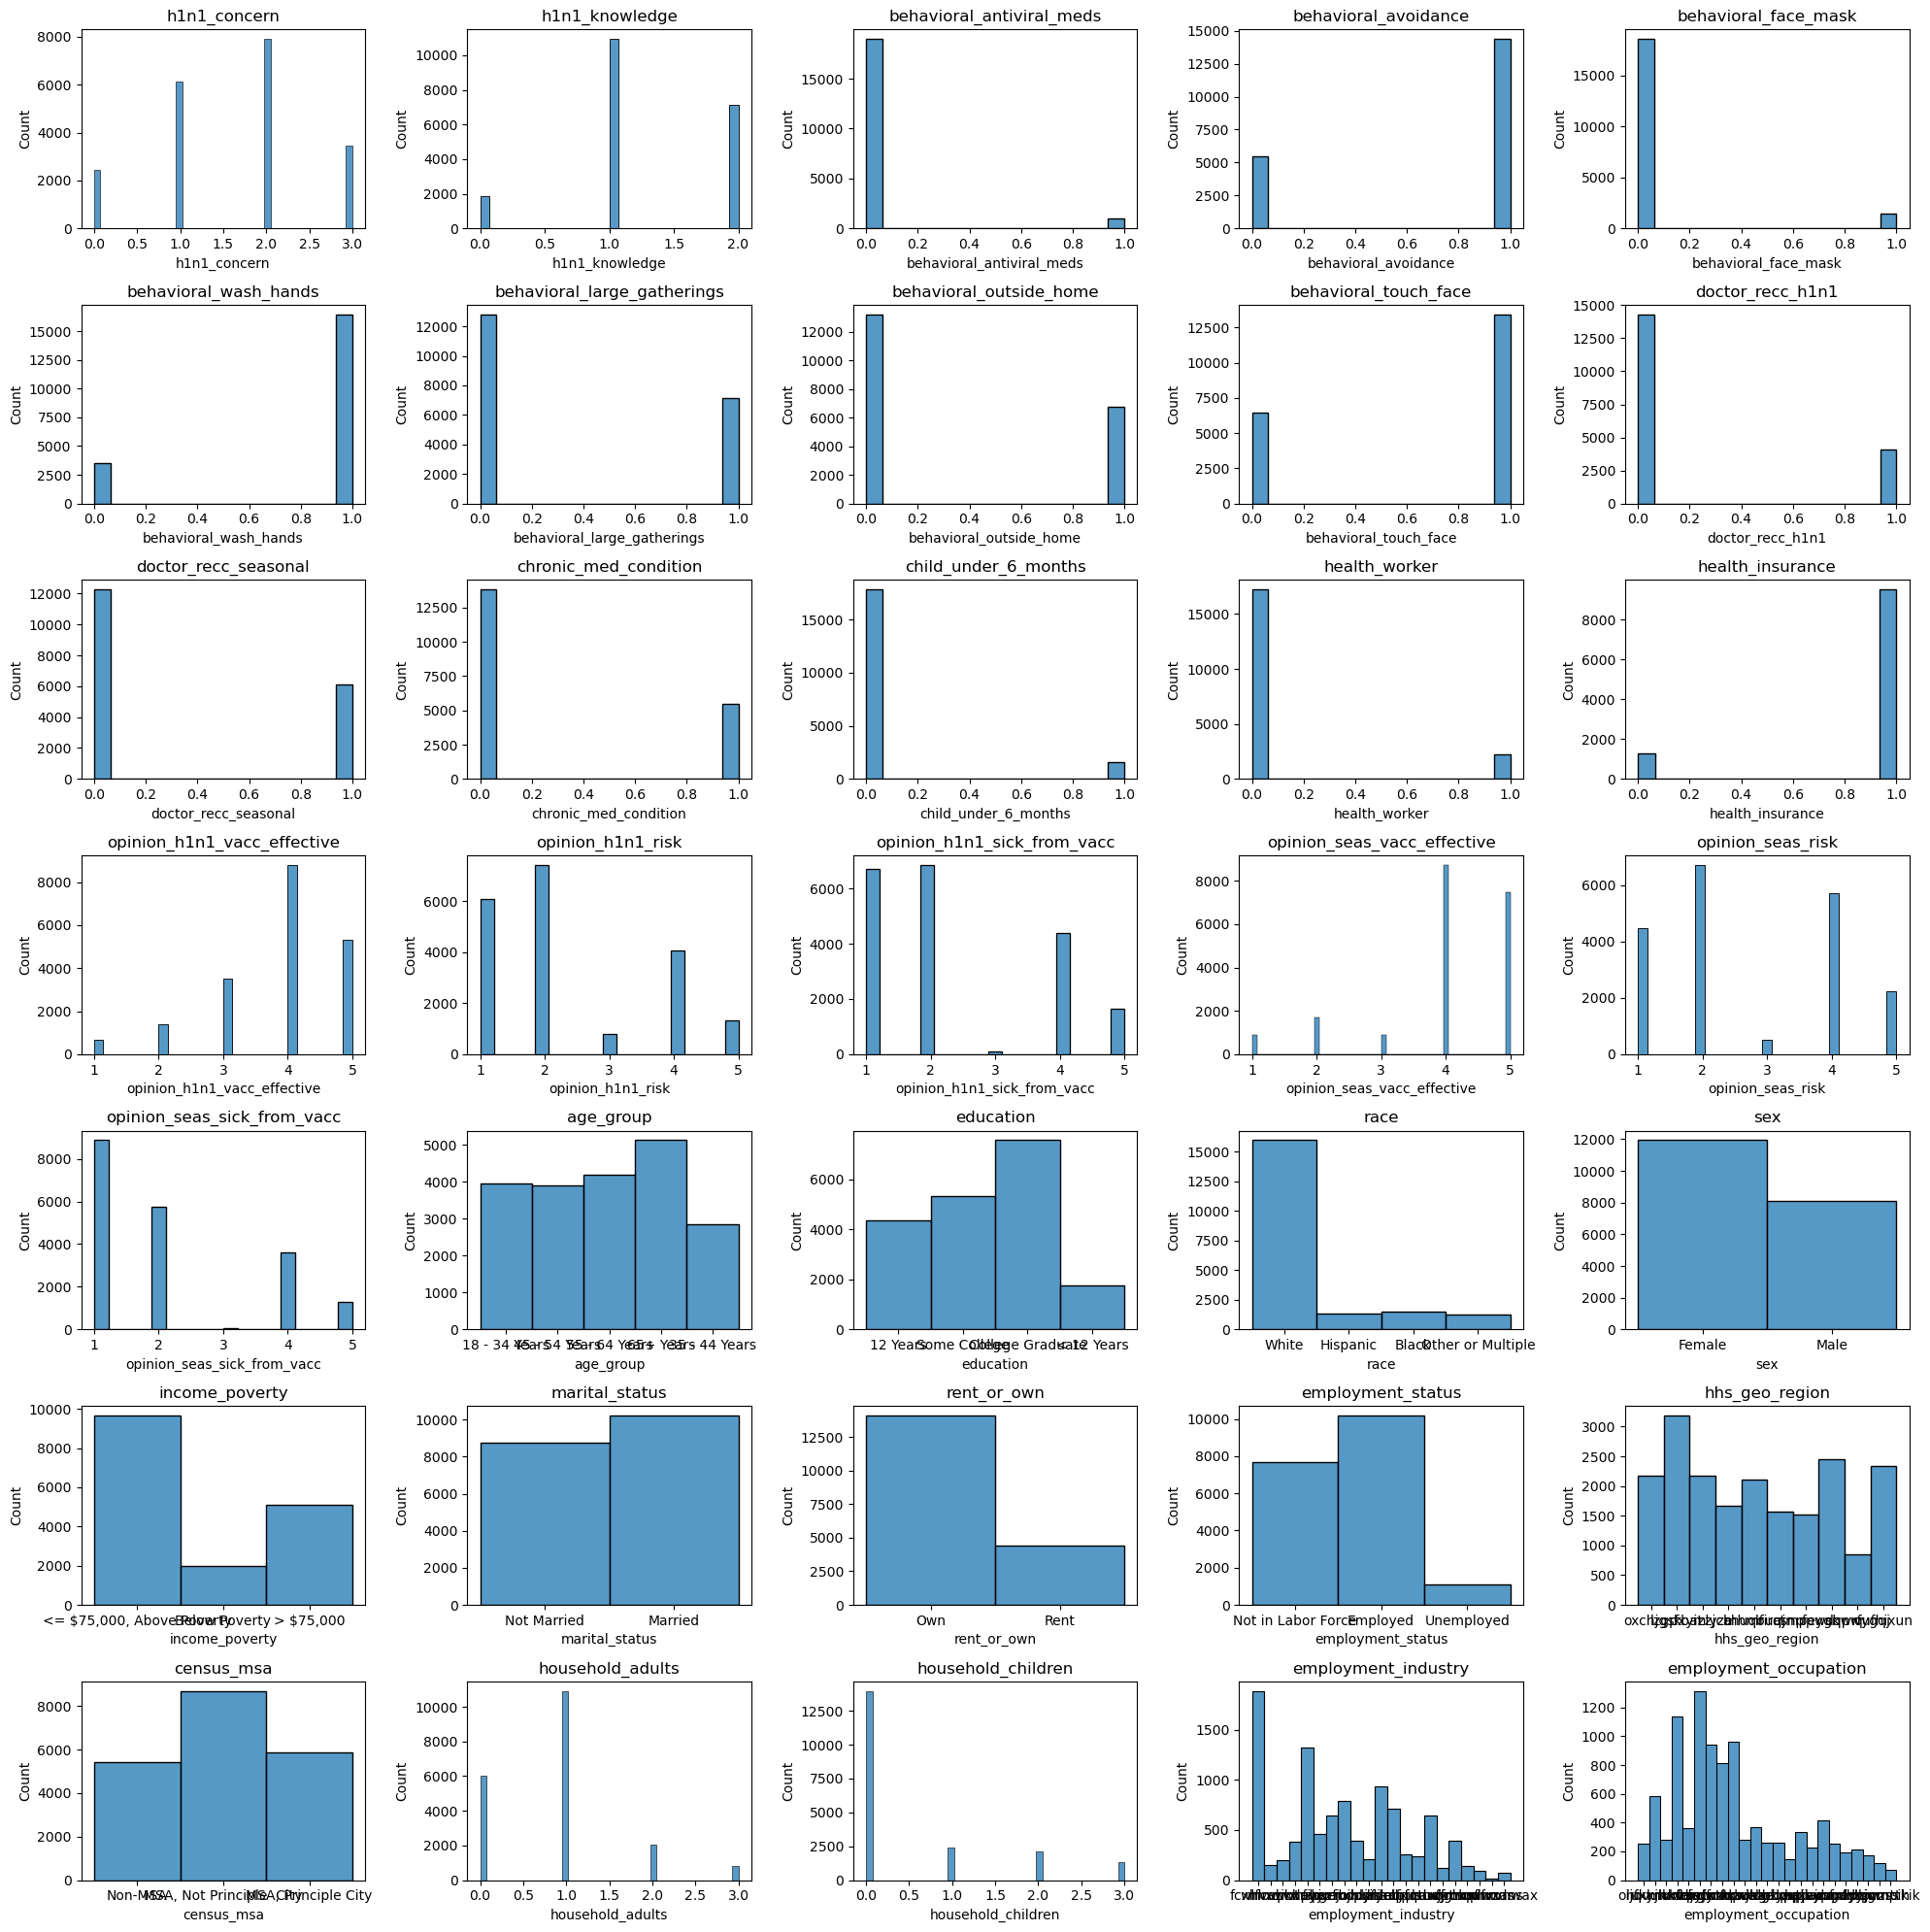

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=7, ncols=5, figsize=(20,20))

for i, column in enumerate(X_train):
    sns.histplot(X_train[column], ax=axes[i//5, i%5]).set_title(column)
    
plt.tight_layout();

The above visualizations provide a rough sense of the distributions of these features. The features vary widely in their distributuions: some are highly skewed (i.e. "behavioral_antiviral_meds" and "opinion_seas_sick_from_vacc"), while others are more uniformly distributed (i.e. "marital_status").

### Numeric Features

Many (though not all) of the numeric features are binary, with 0 representing "no" and 1 representing "yes". Other numeric features utilize rating scales (with 0 being the null response and larger values being increasingly alternative responses) and a few utilize counts (i.e. number of people in household). Although these columns are encoded as float64 values, the actual values themselves are integers. However, not all of the numeric columns are on the same scale: while many only contain values of 0 or 1, several include values from 0-2, 0-3, or even 0-5. Therefore, these numbers will need to be scaled in order to accurately fit to certain classifier models.

### Categorical Features

Like many of the numeric features, some of the categorical features are also binary (i.e. "rent_or_own"). Other categorical features have more than two values (for example, "education"). It is also noteworthy that some of the categorical features are actually binned numeric features (i.e. "age_group"). These features will be discussed in greater detail when considering encoding during preprocessing.

It is worth acknowledging that some of the categorical distributions shown here are difficult to interpret because of the axis labels. However, these labels are actually meaningless because they values have been encoded as random-character strings. Therefore, no meaning can be gained from the labels. Still, we are able to see that for some of these features (i.e. "employment_industry") there are values that are significantly more common than others, while for other features (i.e. "hhs_geo_region"), the values have a more uniform (although not perfectly uniform) distribution.

## Exploratory Analysis: Target Variable

In [32]:
y_train.value_counts(normalize=True)

seasonal_vaccine
0    0.531103
1    0.468897
Name: proportion, dtype: float64

The target variable is a binary value that indicates whether an individual did (1) or did not (0) receive their seasonal flu vaccine. In this dataset, approximately 53% of individuals _did not_ get vaccinated, and the remaining 47% _did_ get vaccinated.

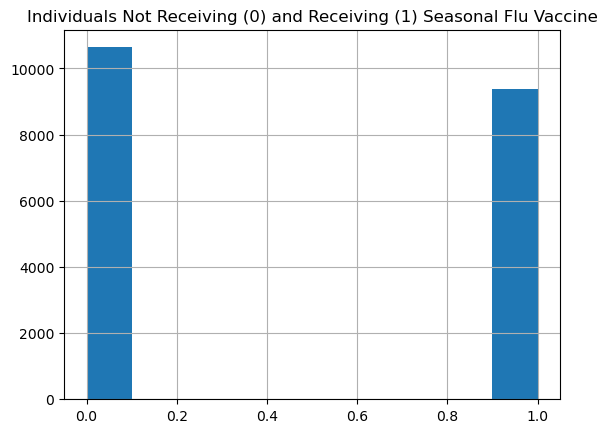

In [33]:
y_train.hist().set_title("Individuals Not Receiving (0) and Receiving (1) Seasonal Flu Vaccine");

The distribution of individuals who did and did not receive the seasonal flu vaccine is fairly balanced. Therefore, no undersampling/oversampling techniques will be necessary.

# Missing Data

As noted above, there are several features with significant amounts of data missing. In the cell below, I will display the list of columns with the number of missing values per column, sorted in descending order.

In [34]:
X_train.isna().sum().sort_values(ascending=False)

employment_occupation          10074
employment_industry             9974
health_insurance                9233
income_poverty                  3269
doctor_recc_h1n1                1635
doctor_recc_seasonal            1635
rent_or_own                     1512
employment_status               1081
education                       1040
marital_status                  1038
chronic_med_condition            717
child_under_6_months             605
health_worker                    597
opinion_seas_sick_from_vacc      407
opinion_seas_risk                387
opinion_seas_vacc_effective      349
opinion_h1n1_sick_from_vacc      301
opinion_h1n1_vacc_effective      299
opinion_h1n1_risk                292
household_children               188
household_adults                 188
behavioral_avoidance             157
behavioral_touch_face             98
h1n1_knowledge                    87
behavioral_large_gatherings       70
h1n1_concern                      67
behavioral_outside_home           58
b

It is possible that human error (for example, skipping a question) led to some of these missing values. However, a closer examination of the survey illuminates that this is likely not the case. 

### Random-Character Strings

The two columns with the most missing data are the 'employment_occupation' and 'employment_industry' columns. 

Consider the number of unique values that were entered in the "employment_occupation" column. Again, because these columns were encoded as random-character strings, the values themselves will not be useful to us.

In [35]:
print("Number of unique values in 'employment_occupation':", len(X_train['employment_occupation'].value_counts()))
print()
print("Most common values in 'employment_occupation':", X_train['employment_occupation'].value_counts().head(2))
print()
print("Least common values in 'employment_occupation':", X_train['employment_occupation'].value_counts().tail(2))

Number of unique values in 'employment_occupation': 23

Most common values in 'employment_occupation': employment_occupation
xtkaffoo    1316
mxkfnird    1139
Name: count, dtype: int64

Least common values in 'employment_occupation': employment_occupation
dcjcmpih    117
pvmttkik     71
Name: count, dtype: int64


Despite not knowing what the specific values in these columns actually represent, we can infer from the number of unique values in each column that the categorizations are **not exhaustive**. Unless these categories were highly generic, it is unlikely that the 10,056 indivdiuals who responded to this question only fell into 23 unique occupations.

What is more likely is that many of the remaining 9,974 individuals fell into other occupations, but these groups were relatively insignificant in size and therefore were not encoded as random strings. As shown above, the least commonly encoded string still occurs 71 times. It is unlikely that the true least commonly occuring occupation occured 71 times. Instead, there was likely a cutoff for the number of occurrences in order for a value to be represented. In this case, occupations that were insignificant in size were not encoded as random strings; instead, they were not encoded at all, leading to the missing values.

_In this case (and in the case of the employment_industry column, which also encodes categories as random character strings), the missing values should not be imputed as the most commonly occuring value or imputed using the given distribution of occupations. Instead, a separate class such as "Other" is likely the most accurate representation. **Therefore, these values will be filled with the string "Other".** (Note that the particular label (i.e. "Other" vs. "Missing") is not significant since these columns will later be one-hot encoded.)_

### Other Columns

Additional consideration is necessary for handling the other columns. Consider the health_insurance column:

In [36]:
X_train["health_insurance"].value_counts()

health_insurance
1.0    9514
0.0    1283
Name: count, dtype: int64

In [37]:
X_train["health_insurance"].isna().sum()

9233

Over 9,000 values are missing from this column! Unlike the random-character string values discussed above, a value of "Other" does not make sense in this context: a person either does or does not have health insurance. So, why are there so many missing values here?

The [data description](https://www.drivendata.org/competitions/66/flu-shot-learning/page/211/)  indicates that a value of 0 represents "No" and a value of 1 represents "Yes". However, [the questionnaire](./survey.pdf) used for this survey shows that there are two other possible reponses for binary questions: "Don't Know" and "Refused". Because these values were not encoded, they appear as missing in our dataset.

There are multiple possible approaches for dealing with these values, each with their own advantages and drawbacks. For this model, I will prepare the data in two ways, run baseline models on each, and proceed with tuning and interpretation for the model and preparation strategy with the highest baseline score. The two preparation strategies are outlined below.

### **Preparation strategy #1: Fill missing values with a unique value and one-hot encode.** 

Often, missing values are imputed with the mean values (for numeric columns) or the most frequently occurring values (for categorical columns). However, this approach assumes that the missing values follow the same patterns/trends as the non-missing values. This may not actually be the case for missing values in this dataset. 

For example, perhaps individuals that did not respond to the health insurance question are less likely to have health insurance. Perhaps individuals that did not respond to the income question have significantly higher (or lower) than average incomes. The specific interpretation of the missing values is not of particular importance at this stage: what _is_ important is that the fact that the information is missing could itself be useful for predicting the target variable. 

Therefore, it may be beneficial to treat these missing values as their own category of response, just like "Yes" and "No" are treated as their own categories.

**For this strategy, all columns will be converted to categorical (rather than numeric) values, missing values will be filled with the string "Missing", and all columns will be one-hot encoded.**

While it may seem counterintuitive to convert all columns to object types only to convert back to numeric types through one-hot encoding, consider that the underlying data itself is in fact categorical: questions were yes/no questions, or respondents were given options to chose from. In essence, I will be undoing the existing encoding in order to include an additional response value, and then re-encoding the values.

### **Preparation strategy #2: Fill missing values with the mean/mode value and include an indicator column.**

It is noteworthy that while the approach above may work well for binary features, it may mitigate the incremental effects of other features with ordinal values. 

For example, consider the feature "h1n1_concern", which is rated on a scale of 0 to 3, with 0 being "Not at all concerned" and 3 being "Very concerned". These response values have ordinal value: that is, "Somwhat concerned" (2) is closer to "Very concerned" (3) than "Not at all concerned" (0). The relationships between these values will be mitigated if this column is one-hot encoded, but if an additional category such as "Refused" or "Don't Know" (which does not fit into the ordinal value system) were included, one-hot encoding would be necessary.

To avoid this information loss, in lieu of creating a separate category for missing values, these missing values can be imputed.

**For this strategy, missing values will be filled with the mean value for numeric data or the mode value for categorical data. An indicator column will be added to indicate whether or not the value was initially missing.**

For this preparation strategy, I will also consider the ordinal value of categorical features (such as age, education, and income).

### Preparation Strategy Advantages and Drawbacks

**Preparation strategy #1: Fill missing values with a unique value and one-hot encode.**
* **Advangate**: No noise is added to the dataset.
* **Disadvantage**: Information from features with ordinal values is lost.

**Preparation strategy #2: Fill missing values with the mean/mode value and include an indicator column.**
* **Advangate**: No information from features with ordinal values is lost.
* **Disadvantage**: Noise is added to the dataset.

The best way to know which of these strategies will be more successful is to run the models and compare, which is how I will proceed in the sections below.

These models will be compared using the model's overall accuracy. 

# Preparation strategy #1: Fill missing values with a unique value and one-hot encode.

## Preprocessing Training Data

First, I will fill the missing values with the string "Missing". Then, I will one-hot encode the entire DataFrame.

### Imputing Missing Values with "Missing" String

In [38]:
# Note that the columns include float64 and object dtypes, and the non-null counts are not all 20030
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20030 entries, 25194 to 23654
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 19963 non-null  float64
 1   h1n1_knowledge               19943 non-null  float64
 2   behavioral_antiviral_meds    19974 non-null  float64
 3   behavioral_avoidance         19873 non-null  float64
 4   behavioral_face_mask         20016 non-null  float64
 5   behavioral_wash_hands        19994 non-null  float64
 6   behavioral_large_gatherings  19960 non-null  float64
 7   behavioral_outside_home      19972 non-null  float64
 8   behavioral_touch_face        19932 non-null  float64
 9   doctor_recc_h1n1             18395 non-null  float64
 10  doctor_recc_seasonal         18395 non-null  float64
 11  chronic_med_condition        19313 non-null  float64
 12  child_under_6_months         19425 non-null  float64
 13  health_worker    

In [39]:
X_train['doctor_recc_h1n1'].value_counts()

doctor_recc_h1n1
0.0    14318
1.0     4077
Name: count, dtype: int64

In [44]:
# Note that all columns are object type and there are no missing values
X_train = X_train.fillna("Missing").astype(str)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20030 entries, 25194 to 23654
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   h1n1_concern                 20030 non-null  object
 1   h1n1_knowledge               20030 non-null  object
 2   behavioral_antiviral_meds    20030 non-null  object
 3   behavioral_avoidance         20030 non-null  object
 4   behavioral_face_mask         20030 non-null  object
 5   behavioral_wash_hands        20030 non-null  object
 6   behavioral_large_gatherings  20030 non-null  object
 7   behavioral_outside_home      20030 non-null  object
 8   behavioral_touch_face        20030 non-null  object
 9   doctor_recc_h1n1             20030 non-null  object
 10  doctor_recc_seasonal         20030 non-null  object
 11  chronic_med_condition        20030 non-null  object
 12  child_under_6_months         20030 non-null  object
 13  health_worker                200

### One Hot Encoding

In [49]:
from sklearn.preprocessing import OneHotEncoder

# instantiates OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)

# fits and transforms OneHotEncoder object on the categorical training data
X_train_ohe = ohe.fit_transform(X_train)

# re-formats the array as a DataFrame
X_train_ohe = pd.DataFrame(X_train_ohe, 
                           columns=ohe.get_feature_names_out(X_train.columns),
                           index=X_train.index)

X_train_ohe

,h1n1_concern_0.0,h1n1_concern_1.0,h1n1_concern_2.0,h1n1_concern_3.0,h1n1_concern_Missing,h1n1_knowledge_0.0,h1n1_knowledge_1.0,h1n1_knowledge_2.0,h1n1_knowledge_Missing,behavioral_antiviral_meds_0.0,...,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
respondent_id,,,,,,,,,,,,,,,,,,,,,
25194,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14006,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11285,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2900,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
19083,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5390,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Preprocessing Testing Data

The same preprocessing steps will be repeated on the testing data.

In [55]:
# fills missing values with string "Missing" and converts all columns to string dtype
X_test = X_test.fillna("Missing").astype(str)

# transforms X_test using fitted OneHotEncoder object
X_test_ohe = ohe.transform(X_test)

#re-formats the array as a DataFrame
X_test_ohe = pd.DataFrame(X_test_ohe,
                          columns = ohe.get_feature_names_out(X_test.columns),
                          index=X_test.index)

X_test_ohe

,h1n1_concern_0.0,h1n1_concern_1.0,h1n1_concern_2.0,h1n1_concern_3.0,h1n1_concern_Missing,h1n1_knowledge_0.0,h1n1_knowledge_1.0,h1n1_knowledge_2.0,h1n1_knowledge_Missing,behavioral_antiviral_meds_0.0,...,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
respondent_id,,,,,,,,,,,,,,,,,,,,,
15772,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9407,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16515,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23353,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10008,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25990,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14302,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3817,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Baseline Models

Now, I will create baseline models using the preprocessed training and testing data. The scores will be added to a list, which will be used to compare scores across models.

In [65]:
models_1 = []
scores_1 = []

### Baseline Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression

baseline_logreg = LogisticRegression()

baseline_logreg.fit(X_train_ohe, y_train)

print("Training score: ", baseline_logreg.score(X_train_ohe, y_train))
print("Testing score: ", baseline_logreg.score(X_test_ohe, y_test))

Training score:  0.7865202196704942
Testing score:  0.7892766212370825


/Users/carolinesurratt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [67]:
models_1.append("baseline_logreg")
scores_1.append(baseline_logreg.score(X_test_ohe, y_test))

### GridSearch Logistic Regression

In [68]:
logreg = LogisticRegression()

param_grid = {
    'fit_intercept': [True, False],
    'C': [1, 1e6, 1e12],
    'solver': ['lbfgs', 'liblinear']
}

from sklearn.model_selection import GridSearchCV

gridsearch_logreg = GridSearchCV(logreg, param_grid, cv=5, verbose=0)

gridsearch_logreg.fit(X_train_ohe, y_train)

print(gridsearch_logreg.best_params_)
print("Training score: ", gridsearch_logreg.score(X_train_ohe, y_train))
print("Testing score: ", gridsearch_logreg.score(X_test_ohe, y_test))

/Users/carolinesurratt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/carolinesurratt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-

/Users/carolinesurratt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/carolinesurratt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-

{'C': 1000000000000.0, 'fit_intercept': True, 'solver': 'lbfgs'}
Training score:  0.7865701447828257
Testing score:  0.7898756926763516


/Users/carolinesurratt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [69]:
models_1.append("gridsearch_logreg")
scores_1.append(gridsearch_logreg.score(X_test_ohe, y_test))

### Baseline Decision Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier

baseline_tree = DecisionTreeClassifier(random_state=42)

baseline_tree.fit(X_train_ohe, y_train)

print("Training score: ", baseline_tree.score(X_train_ohe, y_train))
print("Testing score: ", baseline_tree.score(X_test_ohe, y_test))

Training score:  1.0
Testing score:  0.6913284409165793


In [71]:
models_1.append("baseline_tree")
scores_1.append(baseline_tree.score(X_test_ohe, y_test))

### GridSearch Decision Tree

In [72]:
clf = DecisionTreeClassifier(random_state=42)

parameter_grid = {'criterion': ['gini', 'entropy'],
                  'max_depth': [4, 5, 6, 7, 8, 9, 10],
                  'min_samples_split': [120, 125]}

gridsearch_tree = GridSearchCV(clf, parameter_grid, cv=3)
gridsearch_tree.fit(X_train_ohe, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [120, 125]})

In [73]:
print(gridsearch_tree.best_params_)
print("Training score: ", gridsearch_tree.score(X_train_ohe, y_train))
print("Testing score: ", gridsearch_tree.score(X_test_ohe, y_test))

{'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 120}
Training score:  0.7711432850723914
Testing score:  0.7648644600868654


In [74]:
models_1.append("gridsearch_tree")
scores_1.append(gridsearch_tree.score(X_test_ohe, y_test))

### Baseline KNN

In [76]:
from sklearn.neighbors import KNeighborsClassifier

baseline_knn = KNeighborsClassifier()

baseline_knn.fit(X_train_ohe, y_train)

print("Training score: ", baseline_knn.score(X_train_ohe, y_train))
print("Testing score: ", baseline_knn.score(X_test_ohe, y_test))

Training score:  0.809136295556665
Testing score:  0.7130447805900854


In [77]:
models_1.append("baseline_knn")
scores_1.append(baseline_knn.score(X_test_ohe, y_test))

### GridSearch KNN

In [79]:
knn = KNeighborsClassifier()
param_grid = { 'n_neighbors' : [75, 100, 125, 150],
               'weights' : ['uniform', 'distance'],
               'metric' : ['minkowski', 'euclidean', 'manhattan']}

gridsearch_knn = GridSearchCV(knn, param_grid, cv=5)

gridsearch_knn.fit(X_train_ohe, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [75, 100, 125, 150],
                         'weights': ['uniform', 'distance']})

In [80]:
print(gridsearch_knn.best_params_)
print("Training score: ", gridsearch_knn.score(X_train_ohe, y_train))
print("Testing score: ", gridsearch_knn.score(X_test_ohe, y_test))

{'metric': 'minkowski', 'n_neighbors': 100, 'weights': 'uniform'}
Training score:  0.7563654518222666
Testing score:  0.7623184064699715


In [81]:
models_1.append("gridsearch_knn")
scores_1.append(gridsearch_knn.score(X_test_ohe, y_test))

### Baseline Random Forest

In [82]:
from sklearn.ensemble import RandomForestClassifier

baseline_rf = RandomForestClassifier(random_state=42)

baseline_rf.fit(X_train_ohe, y_train)

print("Training score: ", baseline_rf.score(X_train_ohe, y_train))
print("Testing score: ", baseline_rf.score(X_test_ohe, y_test))

Training score:  1.0
Testing score:  0.7843342818631122


In [83]:
models_1.append("baseline_rf")
scores_1.append(baseline_rf.score(X_test_ohe, y_test))

### GridSearch Random Forest

In [84]:
rf= RandomForestClassifier(random_state=42)

param_grid = {'n_estimators': [125, 150, 175],
              'criterion': ['gini', 'entropy', 'log_loss'],
              'max_depth': [25, 50, 75]}

gridsearch_rf = GridSearchCV(rf, param_grid, cv=3)

gridsearch_rf.fit(X_train_ohe, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [25, 50, 75],
                         'n_estimators': [125, 150, 175]})

In [85]:
print(gridsearch_rf.best_params_)
print("Training score: ", gridsearch_rf.score(X_train_ohe, y_train))
print("Testing score: ", gridsearch_rf.score(X_test_ohe, y_test))

{'criterion': 'gini', 'max_depth': 25, 'n_estimators': 150}
Training score:  0.9992011982026959
Testing score:  0.7807398532274974


In [86]:
models_1.append("gridsearch_rf")
scores_1.append(gridsearch_rf.score(X_test_ohe, y_test))

### Baseline XGBoost

Additional preprocessing is needed for the XG Boost Classifier because the model does not support feature names that include "<", "\[", or "]". In the cells below, I will rename these columns. Note that the feature values are not changing, only the column titles.

In [88]:
columns_with_bad_chars = []

for column in X_train_ohe.columns:
    if "," in column or "<" in column or "[" in column or "]" in column:
        columns_with_bad_chars.append(column)
        
columns_with_bad_chars

['education_< 12 Years',
 'income_poverty_<= $75,000, Above Poverty',
 'income_poverty_> $75,000',
 'census_msa_MSA, Not Principle  City',
 'census_msa_MSA, Principle City']

In [89]:
replacement_columns = {
                       'education_< 12 Years': 'education less than 12 years',
                       'income_poverty_<= $75,000, Above Poverty': 'income less than = $75000 but Above Poverty',
                       'income_poverty_> $75,000': 'income_poverty_> $75000',
                       'census_msa_MSA, Not Principle  City' : "census_msa_MSA Not Principle  City",
                       'census_msa_MSA, Principle City': "census_msa_MSA Principle City"
}

X_train_ohe_renamed = X_train_ohe.rename(columns = replacement_columns)
X_test_ohe_renamed = X_test_ohe.rename(columns = replacement_columns)

In [91]:
from xgboost import XGBClassifier

baseline_xgboost = XGBClassifier(random_state=42)

baseline_xgboost.fit(X_train_ohe_renamed, y_train)

print("Training score: ", baseline_xgboost.score(X_train_ohe_renamed, y_train))
print("Testing score: ", baseline_xgboost.score(X_test_ohe_renamed, y_test))

Training score:  0.8800299550673989
Testing score:  0.7771454245918826


In [92]:
models_1.append("baseline_xgboost")
scores_1.append(baseline_xgboost.score(X_test_ohe_renamed, y_test))

### GridSearch XGBoost

In [93]:
estimator = XGBClassifier(random_state=42)

parameters = {
    'max_depth': range(3, 6, 1),
    'n_estimators': range(120, 220, 20),
    'learning_rate': [0.05, 0.07, 0.08, 0.09, 0.1]
}

gridsearch_xg = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    n_jobs = 10,
    cv = 6,
    verbose=True
)

gridsearch_xg.fit(X_train_ohe_renamed, y_train)

Fitting 6 folds for each of 75 candidates, totalling 450 fits


GridSearchCV(cv=6,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=10,
             param_grid={'learning_rate': [0.05, 0.07, 0.08, 0.09, 0.1],
                         'max_depth': range(3, 6),
                         'n_estimators': range(120, 220, 20)},
             verbose=True)

In [94]:
print(gridsearch_xg.best_params_)
print("Training score: ", gridsearch_xg.score(X_train_ohe_renamed, y_train))
print("Testing score: ", gridsearch_xg.score(X_test_ohe_renamed, y_test))

{'learning_rate': 0.07, 'max_depth': 3, 'n_estimators': 200}
Training score:  0.7946080878681977
Testing score:  0.7919724427137936


In [95]:
models_1.append("gridsearch_xg")
scores_1.append(gridsearch_xg.score(X_test_ohe_renamed, y_test))

### Accuracy Scores  

In [195]:
pd.Series(scores_1, index=models_1).sort_values(ascending=False)

gridsearch_xg        0.791972
gridsearch_logreg    0.789876
baseline_logreg      0.789277
baseline_rf          0.784334
gridsearch_rf        0.780740
baseline_xgboost     0.777145
gridsearch_tree      0.764864
gridsearch_knn       0.762318
baseline_knn         0.713045
baseline_tree        0.691328
dtype: float64

In [198]:
best_model_prep_strategy_1 = ("gridsearch_xg", pd.Series(scores_1, index=models_1).sort_values(ascending=False)[0])
best_model_prep_strategy_1

('gridsearch_xg', 0.7919724427137936)

Overall, the XGBoost model that was fitted with using GridSearchCV has the highest accuracy score, with an overall accuracy of 79.2%. This model will be compared to the highest-performing model using the second preparation strategy before additional tuning and classification metrics are considered.

# Preparation strategy #2: Fill missing values with the mean/mode value and include an indicator column.

First, I will reset X_train and X_test by once again calling train_test_split on the original dataset. Because a random seed was used, this will result in the same split.

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Preprocessing Training Data

### Ordinal Value Considerations

Before filling with mean/mode values, I will consider the ordinal value of categorical features.

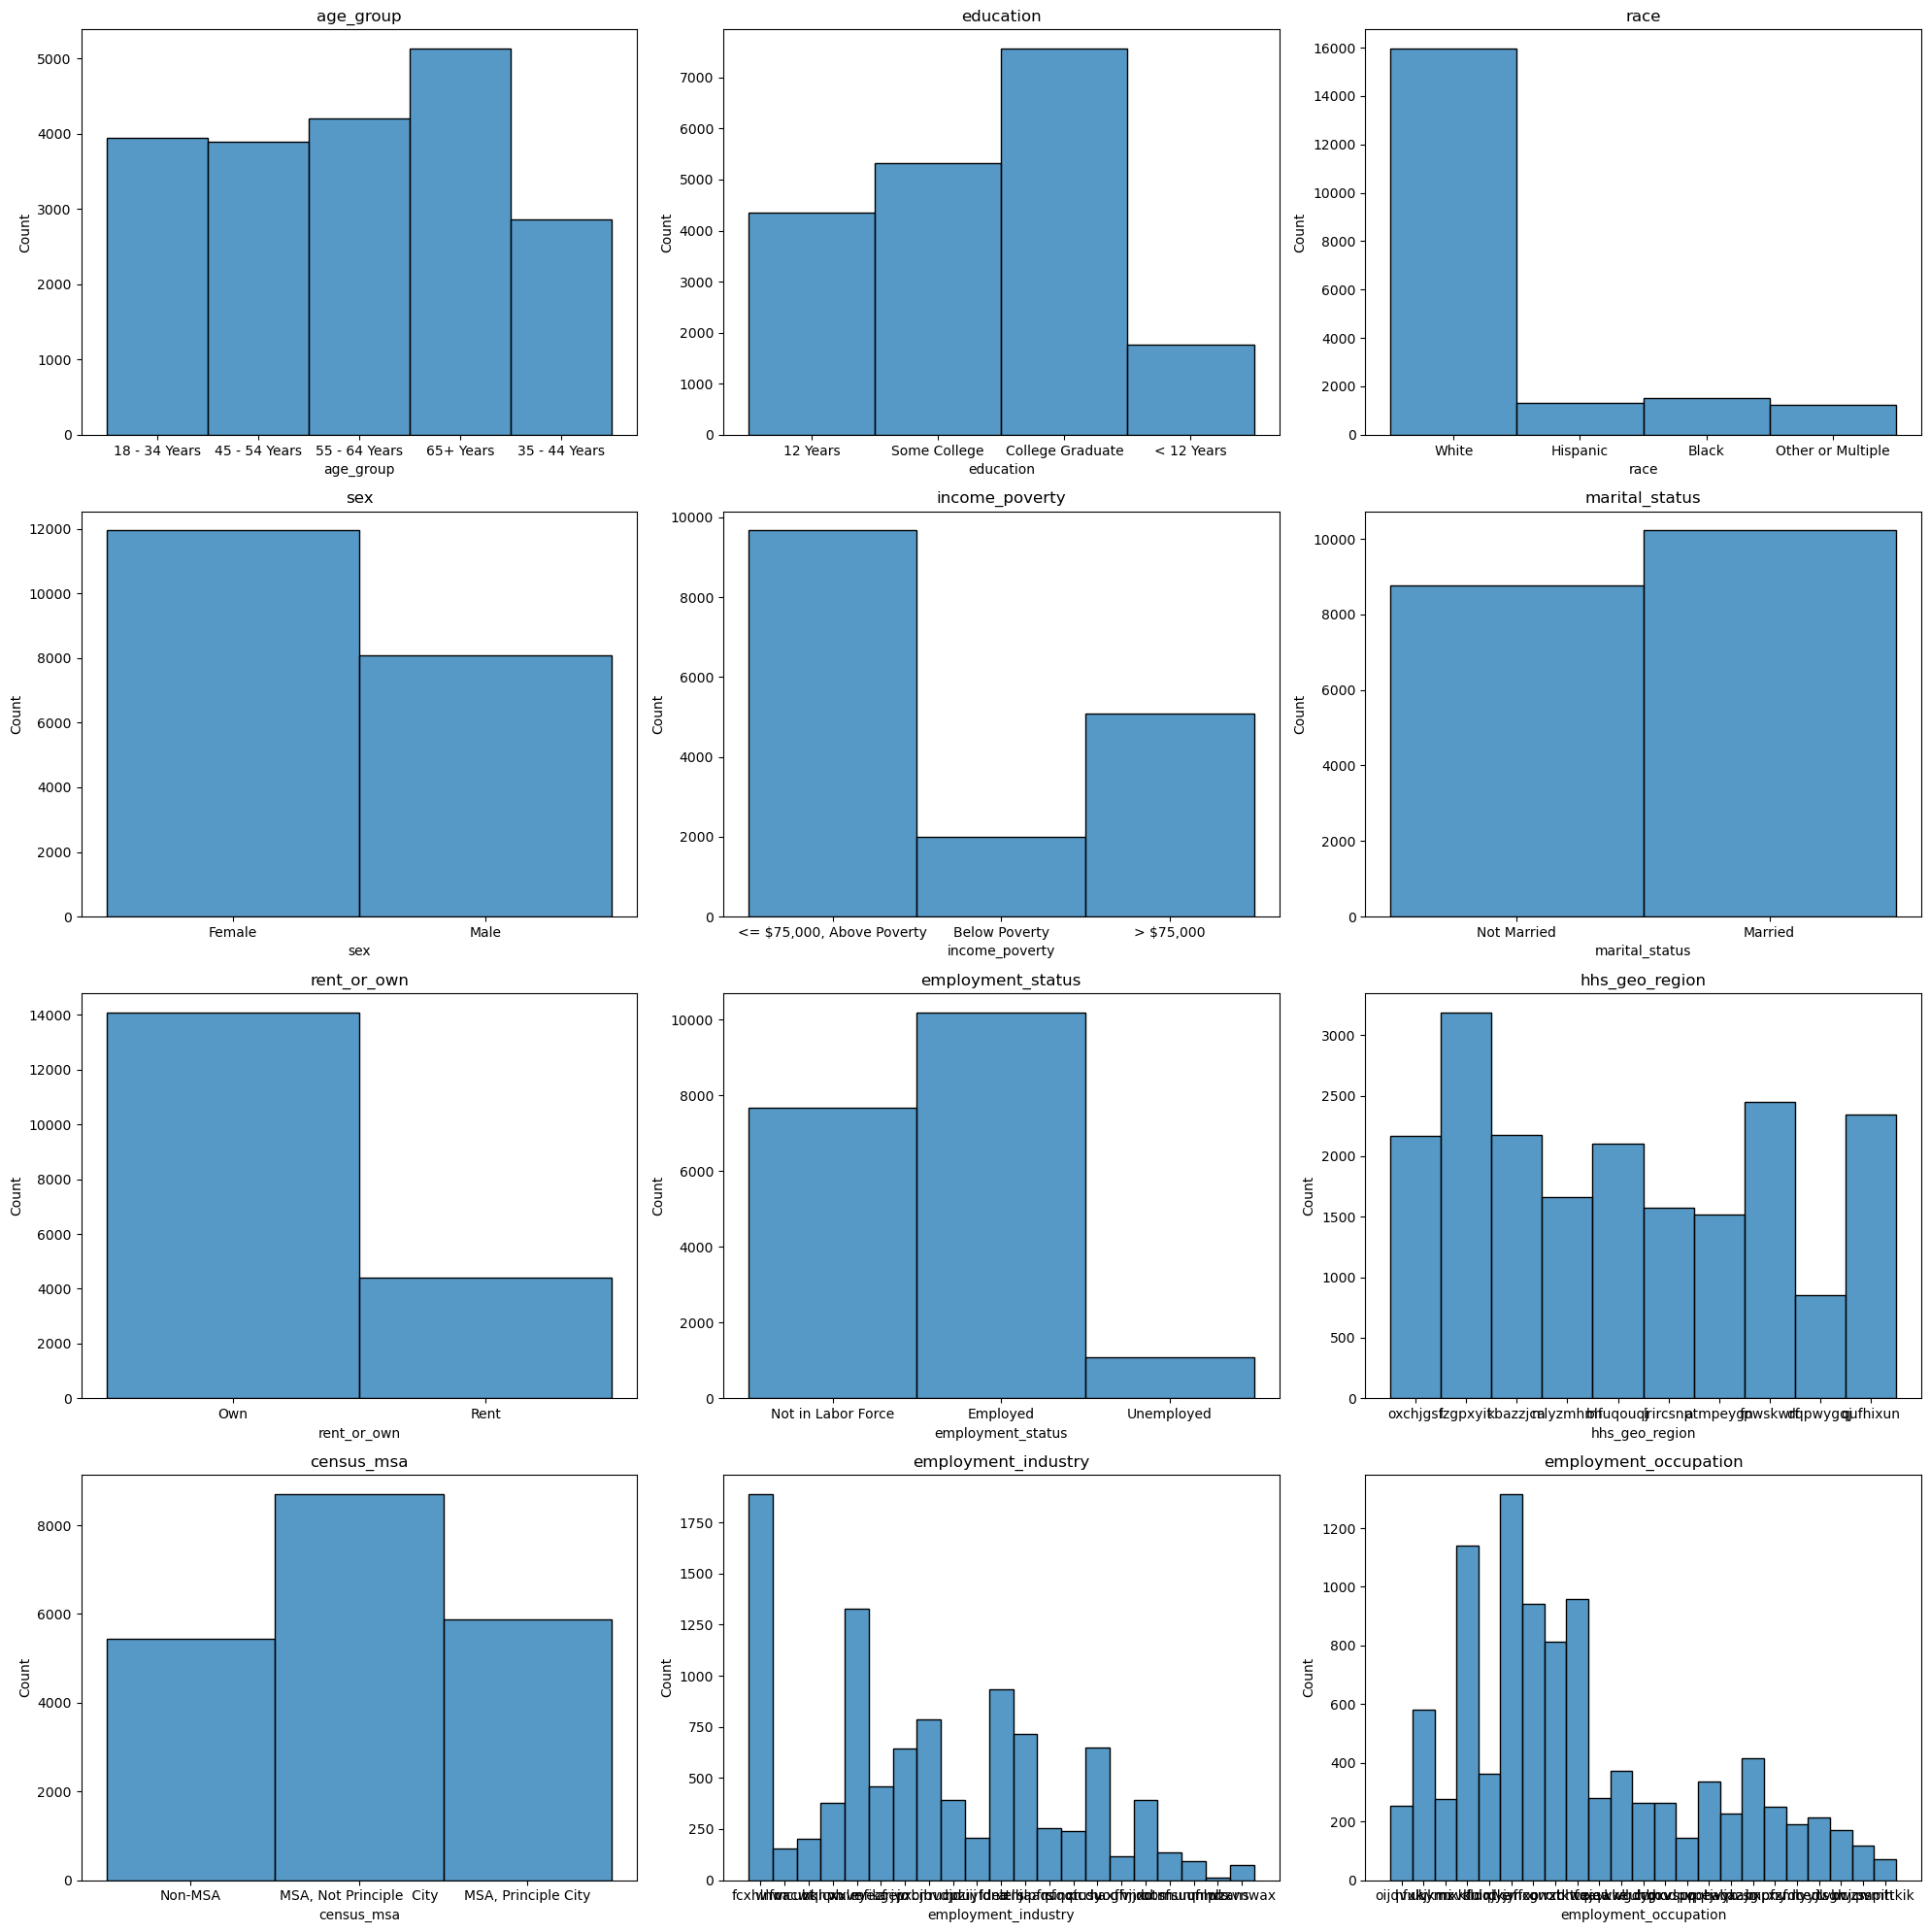

In [145]:
X_train_categorical = X_train.select_dtypes(include=object)

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20,20))

for i, column in enumerate(X_train_categorical.columns):
    sns.histplot(X_train_categorical[column], ax=axes[i//3, i%3]).set_title(column)
    
plt.tight_layout();

Some of these categorical values are binary (i.e. rent_or_own), while others are truly categorical (i.e. employment_status). However, there are a few categories that have ordinal value. 

Recall the previous discussion of the feature h1n1_concern: this feature is rated on a scale of 0 to 3, with 0 being "Not at all concerned" and 3 being "Very concerned". These response values have ordinal value: that is, "Somwhat concerned" (2) is closer to "Very concerned" (3) than "Not at all concerned" (0).

A similar relationship exists between some of these categorical features. Consider the age_group feature: 18-34 Years is closer to 35-44 Years than 65+ Years. If this column was one-hot encoded as-is, this relationship would be lost.

Therefore, for these columns (**age_group, education, and income_poverty**), rather than one-hot encoding, I will encode these values using a hard-coded dictionary that reflects the ordinal value.

I will also encode sex, marital_status, and rent_or_own to reflect the binary nature of these features.

In [146]:
X_train['age_group'] = X_train['age_group'].map({'18 - 34 Years': 0,
                                               '35 - 44 Years': 1,
                                               '45 - 54 Years': 2,
                                               '55 - 64 Years': 3,
                                               '65+ Years': 4})

X_train['education'] = X_train['education'].map({'< 12 Years': 0,
                                                '12 Years': 1,
                                                'Some College': 2,
                                                'College Graduate': 3})

X_train['income_poverty'] = X_train['income_poverty'].map({'Below Poverty': 0,
                                                         '<= $75,000, Above Poverty': 1,
                                                         '> $75,000': 2})

X_train['sex'] = X_train['sex'].map({'Male': 0,
                                    'Female': 1})

X_train['marital_status'] = X_train['marital_status'].map({'Married': 0,
                                                            'Not Married': 1})

X_train['rent_or_own'] = X_train['rent_or_own'].map({'Own': 0,
                                                    'Rent': 1})

### Adding Indicator Column

I will add an indicator column for each existing feature. This column will have a value of 1 if the feature is missing and a 0 otherwise.

In [147]:
for col in X_train.columns:
    X_train[col + "_missing"] = X_train[col].isna().astype(int)

### Imputing Missing Values

Now that an indicator is in place, I will fill missing columns with the mean values (for numeric features) and the most frequent values (for categorical features). The only exception are the employment_occupation and employment_industry features, which were discussed in length in the "Missing Data" section.

In [148]:
X_train["employment_occupation"] = X_train["employment_occupation"].fillna("Missing")
X_train["employment_industry"] = X_train["employment_industry"].fillna("Missing")

In [150]:
# selects only numerical columns
X_train_numerical = X_train.select_dtypes(exclude=object)

# selects only categorical columns
X_train_categorical = X_train.select_dtypes(include=object)

from sklearn.impute import SimpleImputer

# instantiates SimpleImputer that will fill missing values with the column mean
numerical_imputer = SimpleImputer(strategy='mean')

# fits/transforms the SimpleImputer object with the numerical training data and formats as DataFrame
X_train_numerical = pd.DataFrame(numerical_imputer.fit_transform(X_train_numerical),
                                columns = X_train_numerical.columns,
                                index = X_train_numerical.index)

# instantiates SimpleImputer that will fill missing values with most frequent column value
categorical_imputer = SimpleImputer(strategy='most_frequent')

# fits/transforms the SimpleImputer object with the categorical training data and formats as a DataFrame
X_train_categorical = pd.DataFrame(categorical_imputer.fit_transform(X_train_categorical),
                                  columns = X_train_categorical.columns,
                                  index = X_train_categorical.index)

### One-Hot Encoding Categorical Values

In [153]:
# instantiates OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)

# fits and transforms OneHotEncoder object on the categorical training data
X_train_categorical_ohe = ohe.fit_transform(X_train_categorical)

# re-formats the array as a DataFrame (in order to concatenate with numerical training data)
X_train_categorical_ohe = pd.DataFrame(X_train_categorical_ohe, 
                                       columns=ohe.get_feature_names_out(X_train_categorical.columns),
                                       index=X_train_categorical.index)


### Scaling Numeric Values

In the previous preprocessing technique, every column was one-hot encoded, resulting in all columns having a maximum value of 1. Since this technique considered the ordinal value of responses that used rating scales and binned numeric features, not all features utilize the same scale. Therefore, the numeric columns will be scaled in the cell below.

In [154]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_numerical = pd.DataFrame(scaler.fit_transform(X_train_numerical),
                                index=X_train_numerical.index,
                                columns=X_train_numerical.columns)

### Concatenating Preprocessed Numeric and Categorical Data

In [155]:
X_train = pd.concat([X_train_numerical, X_train_categorical_ohe], axis=1)
X_train

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
respondent_id,,,,,,,,,,,,,,,,,,,,,
25194,0.333333,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.221636,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14006,0.666667,0.5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11285,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2900,0.333333,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
19083,0.666667,0.5,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,0.666667,0.5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5390,0.333333,0.5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.221636,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.666667,0.5,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Preprocessing Testing Data

The same preprocessing steps will be repeated on the testing data.

### Ordinal Value Considerations

In [156]:
X_test['age_group'] = X_test['age_group'].map({'18 - 34 Years': 0,
                                               '35 - 44 Years': 1,
                                               '45 - 54 Years': 2,
                                               '55 - 64 Years': 3,
                                               '65+ Years': 4})

X_test['education'] = X_test['education'].map({'< 12 Years': 0,
                                                '12 Years': 1,
                                                'Some College': 2,
                                                'College Graduate': 3})

X_test['income_poverty'] = X_test['income_poverty'].map({'Below Poverty': 0,
                                                         '<= $75,000, Above Poverty': 1,
                                                         '> $75,000': 2})

X_test['sex'] = X_test['sex'].map({'Male': 0,
                                    'Female': 1})

X_test['marital_status'] = X_test['marital_status'].map({'Married': 0,
                                                            'Not Married': 1})

X_test['rent_or_own'] = X_test['rent_or_own'].map({'Own': 0,
                                                    'Rent': 1})

### Adding an Indicator Column

In [157]:
for col in X_test.columns:
    X_test[col + "_missing"] = X_test[col].isna().astype(int)

### Imputing Missing Values

In [159]:
X_test["employment_occupation"] = X_test["employment_occupation"].fillna("Missing")
X_test["employment_industry"] = X_test["employment_industry"].fillna("Missing")

In [160]:
# selects only numerical columns
X_test_numerical = X_test.select_dtypes(exclude=object)

# selects only categorical columns
X_test_categorical = X_test.select_dtypes(include=object)

# transforms the numerical testing data and formats as DataFrame
X_test_numerical = pd.DataFrame(numerical_imputer.transform(X_test_numerical),
                                columns = X_test_numerical.columns,
                                index = X_test_numerical.index)

# transforms the categorical testing data and formats as DataFrame
X_test_categorical = pd.DataFrame(categorical_imputer.transform(X_test_categorical),
                                  columns = X_test_categorical.columns,
                                  index = X_test_categorical.index)

### One-Hot Encoding Categorical Values

In [161]:
# one-hot encodes categorical testing data 
X_test_categorical_ohe = ohe.transform(X_test_categorical)

# re-formatts the array as a DataFrame (in order to concatenate with numerical testing data)
X_test_categorical_ohe = pd.DataFrame(X_test_categorical_ohe, 
                                       columns=ohe.get_feature_names_out(X_test_categorical.columns),
                                       index=X_test_categorical.index)

### Scaling Numeric Values

In [162]:
X_test_numerical = pd.DataFrame(scaler.transform(X_test_numerical),
                                index=X_test_numerical.index,
                                columns=X_test_numerical.columns)


### Concatenating Preprocessed Numeric and Categorical Data

In [163]:
X_test = pd.concat([X_test_numerical, X_test_categorical_ohe], axis=1)
X_test

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
respondent_id,,,,,,,,,,,,,,,,,,,,,
15772,0.666667,0.5,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9407,1.000000,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.221636,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16515,0.333333,0.5,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23353,0.666667,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10008,0.333333,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25990,0.000000,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.221636,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14302,0.666667,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3817,0.333333,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Baseline Models with New Approach

Once again, I will create baseline models using the preprocessed training and testing data. The scores will be added to a list, which will be used to compare scores across models.

In [167]:
models_2 = []
scores_2 = []

### Baseline Logistic Regression

In [168]:
baseline_logreg = LogisticRegression()

baseline_logreg.fit(X_train, y_train)

print("Training score: ", baseline_logreg.score(X_train, y_train))
print("Testing score: ", baseline_logreg.score(X_test, y_test))

Training score:  0.7814777833250125
Testing score:  0.7898756926763516


/Users/carolinesurratt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [169]:
models_2.append("baseline_logreg")
scores_2.append(baseline_logreg.score(X_test, y_test))

### GridSearch Logistic Regression

In [170]:
logreg = LogisticRegression()

param_grid = {
    'fit_intercept': [True, False],
    'C': [1, 1e6, 1e12],
    'solver': ['lbfgs', 'liblinear']
}

gridsearch_logreg = GridSearchCV(logreg, param_grid, cv=5, verbose=0)

gridsearch_logreg.fit(X_train, y_train)

/Users/carolinesurratt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/carolinesurratt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-

/Users/carolinesurratt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/carolinesurratt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-

/Users/carolinesurratt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 1000000.0, 1000000000000.0],
                         'fit_intercept': [True, False],
                         'solver': ['lbfgs', 'liblinear']})

In [171]:
print(gridsearch_logreg.best_params_)
print("Training score: ", gridsearch_logreg.score(X_train, y_train))
print("Testing score: ", gridsearch_logreg.score(X_test, y_test))

{'C': 1, 'fit_intercept': False, 'solver': 'lbfgs'}
Training score:  0.781427858212681
Testing score:  0.7891268533772653


In [172]:
models_2.append("gridsearch_logreg")
scores_2.append(gridsearch_logreg.score(X_test, y_test))

### Baseline Tree

In [173]:
baseline_tree = DecisionTreeClassifier(random_state=42)

baseline_tree.fit(X_train, y_train)

print("Training score: ", baseline_tree.score(X_train, y_train))
print("Testing score: ", baseline_tree.score(X_test, y_test))

Training score:  1.0
Testing score:  0.6929758873745694


In [174]:
models_2.append("baseline_tree")
scores_2.append(baseline_tree.score(X_test, y_test))

### GridSearch Tree

In [175]:
clf = DecisionTreeClassifier(random_state=42)

parameter_grid = {'criterion': ['gini', 'entropy'],
                  'max_depth': [4, 5, 6, 7, 8, 9, 10],
                  'min_samples_split': [120, 125]}

gridsearch_tree = GridSearchCV(clf, parameter_grid, cv=3)
gridsearch_tree.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [120, 125]})

In [176]:
print(gridsearch_tree.best_params_)
print("Training score: ", gridsearch_tree.score(X_train, y_train))
print("Testing score: ", gridsearch_tree.score(X_test, y_test))

{'criterion': 'entropy', 'max_depth': 9, 'min_samples_split': 125}
Training score:  0.7858711932101847
Testing score:  0.7659128351055864


In [177]:
models_2.append("gridsearch_tree")
scores_2.append(gridsearch_tree.score(X_test, y_test))

### Baseline KNN

In [178]:
baseline_knn = KNeighborsClassifier()

baseline_knn.fit(X_train, y_train)

print("Training score: ", baseline_knn.score(X_train, y_train))
print("Testing score: ", baseline_knn.score(X_test, y_test))

Training score:  0.792061907139291
Testing score:  0.6923768159353003


In [179]:
models_2.append("baseline_knn")
scores_2.append(baseline_knn.score(X_test, y_test))

### GridSearch KNN

In [180]:
knn = KNeighborsClassifier()
param_grid = { 'n_neighbors' : [75, 100, 125, 150],
               'weights' : ['uniform', 'distance'],
               'metric' : ['minkowski', 'euclidean', 'manhattan']}

gridsearch_knn = GridSearchCV(knn, param_grid, cv=5)

gridsearch_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [75, 100, 125, 150],
                         'weights': ['uniform', 'distance']})

In [181]:
print(gridsearch_knn.best_params_)
print("Training score: ", gridsearch_knn.score(X_train, y_train))
print("Testing score: ", gridsearch_knn.score(X_test, y_test))

{'metric': 'manhattan', 'n_neighbors': 75, 'weights': 'distance'}
Training score:  1.0
Testing score:  0.7486895312265988


In [182]:
models_2.append("gridsearch_knn")
scores_2.append(gridsearch_knn.score(X_test, y_test))

### Baseline RandomForest

In [183]:
baseline_rf = RandomForestClassifier(random_state=42)

baseline_rf.fit(X_train, y_train)

print("Training score: ", baseline_rf.score(X_train, y_train))
print("Testing score: ", baseline_rf.score(X_test, y_test))

Training score:  1.0
Testing score:  0.7864310319005542


In [184]:
models_2.append("baseline_rf")
scores_2.append(baseline_rf.score(X_test, y_test))

### GridSearch RandomForest

In [185]:
rf= RandomForestClassifier(random_state=42)

param_grid = {'n_estimators': [125, 150, 175],
              'criterion': ['gini', 'entropy', 'log_loss'],
              'max_depth': [25, 50, 75]}

gridsearch_rf = GridSearchCV(rf, param_grid, cv=3)

gridsearch_rf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [25, 50, 75],
                         'n_estimators': [125, 150, 175]})

In [186]:
print(gridsearch_rf.best_params_)
print("Training score: ", gridsearch_rf.score(X_train, y_train))
print("Testing score: ", gridsearch_rf.score(X_test, y_test))

{'criterion': 'entropy', 'max_depth': 50, 'n_estimators': 175}
Training score:  1.0
Testing score:  0.7862812640407368


In [187]:
models_2.append("gridsearch_rf")
scores_2.append(gridsearch_rf.score(X_test, y_test))

### Baseline XGBoost

In [188]:
baseline_xgboost = XGBClassifier(random_state=42)

baseline_xgboost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [189]:
print("Training score: ", baseline_xgboost.score(X_train, y_train))
print("Testing score: ", baseline_xgboost.score(X_test, y_test))

Training score:  0.882626060908637
Testing score:  0.7840347461434776


In [190]:
models_2.append("baseline_xgboost")
scores_2.append(baseline_xgboost.score(X_test, y_test))

### GridSearch XGBoost

In [191]:
estimator = XGBClassifier(random_state=42)

parameters = {
    'max_depth': range(3, 6, 1),
    'n_estimators': range(120, 220, 20),
    'learning_rate': [0.05, 0.07, 0.08, 0.09, 0.1]
}

gridsearch_xg = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    n_jobs = 10,
    cv = 6,
    verbose=True
)

gridsearch_xg.fit(X_train, y_train)

Fitting 6 folds for each of 75 candidates, totalling 450 fits


GridSearchCV(cv=6,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=10,
             param_grid={'learning_rate': [0.05, 0.07, 0.08, 0.09, 0.1],
                         'max_depth': range(3, 6),
                         'n_estimators': range(120, 220, 20)},
             verbose=True)

In [192]:
print(gridsearch_xg.best_params_)
print("Training score: ", gridsearch_xg.score(X_train, y_train))
print("Testing score: ", gridsearch_xg.score(X_test, y_test))

{'learning_rate': 0.09, 'max_depth': 4, 'n_estimators': 160}
Training score:  0.8065901148277583
Testing score:  0.7960161749288602


In [193]:
models_2.append("gridsearch_xg")
scores_2.append(gridsearch_xg.score(X_test, y_test))

### Previewing Scores

In [200]:
pd.Series(scores_2, index=models_2).sort_values(ascending=False)

gridsearch_xg        0.796016
baseline_logreg      0.789876
gridsearch_logreg    0.789127
baseline_rf          0.786431
gridsearch_rf        0.786281
baseline_xgboost     0.784035
gridsearch_tree      0.765913
gridsearch_knn       0.748690
baseline_tree        0.692976
baseline_knn         0.692377
dtype: float64

In [202]:
best_model_prep_strategy_2 = ("gridsearch_xg", pd.Series(scores_2, index=models_2).sort_values(ascending=False)[0])
best_model_prep_strategy_2

('gridsearch_xg', 0.7960161749288602)

# Best Baseline Models:

**Preparation strategy #1: Fill missing values with a unique value and one-hot encode.**

In [271]:
best_model_prep_strategy_1

('gridsearch_xg', 0.7919724427137936)

**Preparation strategy #2: Fill missing values with the mean/mode value and include an indicator column.**

In [272]:
best_model_prep_strategy_2

('gridsearch_xg', 0.7960161749288602)

Overall, the best-performing model was the XGBoost Classifier that was fitted using GridSearchCV and data that was processed using the second preparation strategy.

This model has an **accuracy score of approximately 79.6%**, meaning that its predictions are correct 79.6% of the time.

However, in this model, accuracy is not the most important metric, and in fact, the target class is not even the class that we are most concerned with - it is more beneficial to identify individuals who **_did not_** get their flu shot (that is, those with a target value of 0) than those who **_did_** get their flu shot. 

Consider the classification report below:

In [273]:
from sklearn.metrics import classification_report, accuracy_score, precision_score

# Note that although the varaible gridsearch_xg has been called twice, there is no need to reset this variable, as
# we are using the fitted object from the second (most recent) preprocessing strategy.
predictions = gridsearch_xg.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      3634
           1       0.78      0.77      0.78      3043

    accuracy                           0.80      6677
   macro avg       0.79      0.79      0.79      6677
weighted avg       0.80      0.80      0.80      6677



Because we are more concerned with the target value of 0, consider the first row. It would be better to assume that a person has not gotten their seasonal flu vaccine when they actually have (false positive) than assuming that a person has gotten their seasonal flu vaccine when they actually have not (false negative). 

Therefore, we want to prioritize the **recall score** for the target value of 0. 

In [275]:
recall_score(y_test, predictions, pos_label=0)

0.8159053384700055

Therefore, in the tuning that occurs below, the scoring parameter will be adjusted to prioritize recall score for the target value of 0 rather than overall accuracy.

# Model Tuning

The original parameters of the most accurate model are shown below. I will use these parameters as a baseline for  identifying more granular parameters that better optimize the model's precision.

In [276]:
gridsearch_xg.best_params_

{'learning_rate': 0.09, 'max_depth': 4, 'n_estimators': 160}

In order to scoring the target class of 0 (rather than the target class of 1), a custom scoring will be used (credits to Jan K on [Stack Overflow](https://stackoverflow.com/questions/50933561/how-to-specify-positive-label-when-use-precision-as-scoring-in-gridsearchcv)).

In [277]:
from sklearn.metrics import recall_score, make_scorer
custom_scorer = make_scorer(recall_score, greater_is_better=True,  pos_label=0)

In [278]:
estimator = XGBClassifier(random_state=42)

parameters = {
    'max_depth': [2, 3, 4, 5],
    'n_estimators': range(140, 190, 10),
    'learning_rate': [0.085, 0.090, 0.095, 0.1]
}

finetuned_xg = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    n_jobs = 10,
    scoring = custom_scorer,
    cv = 4,
    verbose=True
)

finetuned_xg.fit(X_train, y_train)

Fitting 4 folds for each of 80 candidates, totalling 320 fits


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=10,
             param_grid={'learning_rate': [0.085, 0.09, 0.095, 0.1],
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': range(140, 190, 10)},
             scoring=make_scorer(recall_score, pos_label=0), verbose=True)

In [279]:
print(finetuned_xg.best_params_)
print("Training score: ", finetuned_xg.score(X_train, y_train))
print("Testing score: ", finetuned_xg.score(X_test, y_test))

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 180}
Training score:  0.8192329385222786
Testing score:  0.817831590533847


The recall score for the target value has improved slightly, but only by about 0.002. However, the parameters are somewhat different. I will calibrate the hyperparameters once more to see if additional improvements can be made.

In [281]:
estimator = XGBClassifier(random_state=42)

parameters = {
    'max_depth': [1, 2, 3, 4],
    'n_estimators': range(150, 200, 5),
    'learning_rate': [0.090, 0.095, 0.1]
}

finetuned_xg_2 = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    n_jobs = 10,
    scoring = custom_scorer,
    cv = 4,
    verbose=True
)

finetuned_xg_2.fit(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=10,
             param_grid={'learning_rate': [0.09, 0.095, 0.1],
                         'max_depth': [1, 2, 3, 4],
                         'n_estimators': range(150, 200, 5)},
             scoring=make_scorer(recall_score, pos_label=0), verbose=True)

In [282]:
print(finetuned_xg_2.best_params_)
print("Training score: ", finetuned_xg_2.score(X_train, y_train))
print("Testing score: ", finetuned_xg_2.score(X_test, y_test))

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 190}
Training score:  0.8195149464184998
Testing score:  0.8186571271326362


Again, the recall score for the target value has improved slightly, but only by about 0.001. Because the optimal learning rate is the largest value provided, I will calibrate the hyperparameters once more with a slightly larger learning rate to see if that results in additional improvements to the model.

In [285]:
estimator = XGBClassifier(random_state=42)

parameters = {
    'max_depth': [1, 2, 3],
    'n_estimators': range(180, 200, 2),
    'learning_rate': [0.0950, 0.0975, 0.1000, 0.1025]
}

finetuned_xg_3 = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    n_jobs = 10,
    scoring = custom_scorer,
    cv = 4,
    verbose=True
)

finetuned_xg_3.fit(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=10,
             param_grid={'learning_rate': [0.095, 0.0975, 0.1, 0.1025],
                         'max_depth': [1, 2, 3],
                         'n_estimators': range(180, 200, 2)},
             scoring=make_scorer(recall_score, pos_label=0), verbose=True)

In [286]:
print(finetuned_xg_3.best_params_)
print("Training score: ", finetuned_xg_3.score(X_train, y_train))
print("Testing score: ", finetuned_xg_3.score(X_test, y_test))

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 190}
Training score:  0.8195149464184998
Testing score:  0.8186571271326362


Despite providing smaller step sizes and more granular hyperparameter values, this iteration returned the same optimal values. Therefore, I will terminate the tuning process here.

# Final Model: Interpretation

### Classification Metrics

The model with the highest recall score for the target value of 0 is the model titled "finetuned_xg_3". This model is an XGBoostClassifier with the following hyperparameters:
* learning_rate: 0.1
* max_depth: 2
* n_estimators: 190

In [291]:
predictions = finetuned_xg_3.predict(X_test)

print(accuracy_score(y_test, predictions))

0.7918226748539763


Overall, this model has an accuracy score of 79.2%, meaning that approximately it correctly 79.2% of the predictions that it makes are correct (including both true positives and true negatives). 

In [292]:
print(classification_report(y_test, predictions))
print(recall_score(y_test, predictions, pos_label=0))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      3634
           1       0.78      0.76      0.77      3043

    accuracy                           0.79      6677
   macro avg       0.79      0.79      0.79      6677
weighted avg       0.79      0.79      0.79      6677

0.8186571271326362


This model's overall recall score for the target value of 0 is approximately 81.9%. In plain language, this means that the model can correctly identify 81.9% of respondents who **_did not_** receive their seasonal flu vaccine.

The scores for identifying target values of 1 are slightly lower, but in the context of this problem, target values of 1 are less significant. That is, it is more important that the model correctly identify individuals who did not receive their seasonal flu vaccines, since these are the individuals for which intervention can occur.

### Feature Importances

In the cell below, I will examine the features that have the greatest importance in the model. To imporve interpretability, I will limit the visualization to only include the top 10 features.

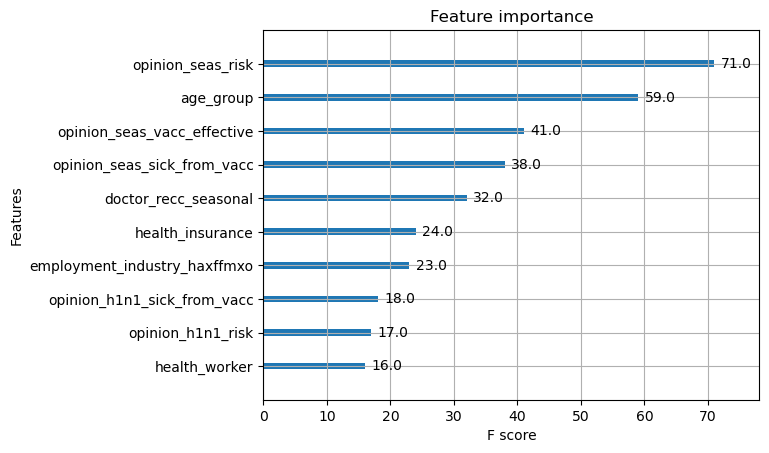

In [297]:
from xgboost import plot_importance

plot_importance(finetuned_xg_3.best_estimator_, max_num_features=10);

The 10 most important features (including their [descriptions](https://www.drivendata.org/competitions/66/flu-shot-learning/page/211/) from the dataset) are: 
* opinion_seas_risk - Respondent's opinion about risk of getting sick with seasonal flu without vaccine
* age_group - Age group of respondent
* opinion_seas_vacc_effective - Respondent's opinion about seasonal flu vaccine effectiveness
* opinion_seas_sick_from_vacc - Respondent's worry of getting sick from taking seasonal flu vaccine
* doctor_recc_seasonal - Seasonal flu vaccine was recommended by doctor
* health_insurance - Has health insurance
* employment_industry - Type of industry respondent is employed in (values represented as short random character strings)
* opinion_h1n1_sick_from_vacc - Respondent's worry of getting sick from taking H1N1 vaccine
* opinion_h1n1_risk - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine
* health_worker - Is a healthcare worker

# Model Implications

As discussed in the Business Understanding section, there may be some benefit to predicting whether an individual (or groups of individuals) have received the seasonal flu vaccine.

However, this model provides more value in identifying which features are most important to predicting whether or not an individual gets vaccinated.

Some of the features are outside of the influence of a healthcare professional: for example, a person's age (2), health insurance status (6), employment industry (7), and employment as a healthcare worker (10).

However, many of the most important features are opinions, and **_are_** within the scope of influence of a healthcare professional. Three of the top five most important features are related to an individual's opinions about the risk of the flu and the risk and effectiveness of vaccines. Additionally, the fifth most important feature is whether or not a doctor recommends the seasonal vaccine.

Therefore, in order to improve vaccination rates, healthcare providers should prioritize impacting the following features:

* Respondent's opinion about risk of getting sick with seasonal flu without vaccine
* Respondent's opinion about seasonal flu vaccine effectiveness
* Respondent's worry of getting sick from taking seasonal flu vaccine
* Seasonal flu vaccine was recommended by doctor

It is important to note that correlation is not causation: perhaps there is some lurking variable that is affecting both the important features and an individual's likelihood of vaccination. To more definitively demonstrate whether interventions would affect the target variable, an experiment with randomized control and experimental groups would be necessary. However, it stands to reason that healthcare providers can influence individuals' opinions by empowering them with the facts.

Healthcare providers can take the following actions in order to influence the features that are the most important to predictive ability:

* **Display informative/educational materials about the risks of the seasonal flu.** These materials could be in the form of posters/displays in medical offices, postings on websites, or reminders in mailers.
* **Talk to individuals about the risks of the flu and the vaccine during _all_ routine/preventative appointments.** Educating individuals about the risks may improve their understanding and change their underlying opinions about vaccines.
* **Directly recommend vaccination to all patients.** This feature has a high importance and is a binary that truly lies within a healthcare providers locus of control. If an individual sees a healthcare provider, that provider should always recommend the flu vaccine. Recommendations could also be given via telephone call, emails, or physical mailers.